<a href="https://colab.research.google.com/github/MatiasMingo/ML-Colab-Projects/blob/main/Diamond_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Diamond price prediction machine

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.pyplot import imshow
import numpy as np
df = pd.read_csv('diamonds.csv')
print("head de diamons.csv para observar los tipos de datos: \n")
df.head()


head de diamons.csv para observar los tipos de datos: 



,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,Usage
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,ToV
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Test
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,ToV
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,ToV
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,ToV


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('diamonds.csv')

print("Numero de elementos básicos por columna:\n")
for col in df.columns:
  print(col, df[col].nunique())
print("\n Tipos de datos por columna sin convertir datos no numéricos en numéricos: \n")
print(df.dtypes)
print("\n Tipos de datos por columna luego de convertir datos no numéricos en numéricos: \n")

"""Funciones para convertir datos no numéricos en numéricos o en NaN """
def convert_cut(value):
  if value =="Ideal":
    return 5
  elif value =="Premium":
    return 4
  elif value =="Very Good":
    return 3
  elif value =="Good":
    return 2
  elif value =="Fair":
    return 1
  else:
    return "NaN"

def convert_color(value):
  if value =="D":
    return 1
  elif value =="E":
    return 2
  elif value =="F":
    return 3
  elif value =="G":
    return 4
  elif value =="H":
    return 5
  elif value =="I":
    return 6
  elif value =="J":
    return 7
  else:
    return "NaN"
def convert_clarity(value):
  if value =="I1":
    return 1
  elif value =="SI2":
    return 2
  elif value =="SI1":
    return 3
  elif value =="VS2":
    return 4
  elif value =="VS1":
    return 5
  elif value =="VVS2":
    return 6
  elif value =="VVS1":
    return 7
  elif value =="IF":
    return 8
  else:
    return "NaN"

df['cut'] = df['cut'].apply(convert_cut)
df['color'] = df['color'].apply(convert_color)
df['clarity'] = df['clarity'].apply(convert_clarity)
print(df.dtypes)
print(" \n Como se puede apreciar se han convertido todos los datos no numéricos en \n numéricos o en NaN cuando corresponde mediante funciones especializadas para cada columna con datos \n no numéricos. Estos valores numéricos parten desde el 1 hasta el numero de la cantidad de \n valores que puede tomar la columna. Siendo el numero mas alto de estos el que representa una mejor cualidad del diamante\n")
print("\n En cuanto a las otras columnas que si són numericas se dejan como están. \n")
print(df.dtypes)
print("\n Se limpian valores nulos de las filas y se checkea por duplicados\n")
clean_df = df.dropna(axis=0)
print("\n Número de datos nulos (NaN):")
print(df.isna().sum())
count_duplicants = 0
count_non_duplicated = 0
duplicant_indexes = list()
for vals in clean_df.duplicated():
  if str(vals) == "True":
    count_duplicants +=1
  else:
    count_non_duplicated +=1
percentage_duplicated = 100*(count_duplicants/(count_duplicants+count_non_duplicated))
print("\n No existen duplicados: \n")
print("Porcentaje de duplicados: {}%".format(percentage_duplicated))

print("\n Se separa el dataframe en training, validation y test y se guardan en archivos .csv sin usar la función train_test_split de sklearn en primera instancia ya que no se pide. \n")
number_of_rows_df = len(df.index)
rows_testing = df.loc[df['Usage'] == "Test"]
print("Testing dataframe: \n")
print(rows_testing)
tov_clean_df = clean_df[~clean_df.isin(rows_testing)]
tov_clean_df = tov_clean_df.dropna(axis=0)
rows_training = tov_clean_df.sample(frac=0.78, replace=False, axis=0)
rows_training = rows_training.dropna(axis=0)
print("Training dataframe: \n")
print(rows_training)
rows_validation = tov_clean_df[~tov_clean_df.isin(rows_training)]
rows_validation = rows_validation.dropna(axis=0)
print("Validation dataframe: \n")
print(rows_validation)

"""Se guardan archivos de testing, training y validation."""
rows_testing.to_csv("testing.csv")
rows_training.to_csv("training.csv")
rows_validation.to_csv("validation.csv")

print("\n Matrices X  y vectores y \n")
print("Para training: \n")
X_training = rows_training.to_numpy()
training_x = []
for vert_training in X_training:
  training_x.append(vert_training[:11])
X_training = np.array(training_x)
y_training = rows_training[["price"]].to_numpy()
print("\n Shape de matriz característica para training X:{} \n".format(X_training.shape))
print("\n Shape de vector de objetivos para training  y:{} \n".format(y_training.shape))

print("\n Para validation: \n")
X_validation = rows_validation.to_numpy()
validation_x = []
for vert_validation in X_validation:
  validation_x.append(vert_validation[:11])
X_validation = np.array(validation_x)
y_validation = rows_validation[["price"]].to_numpy()
print("\n Shape de matriz característica para validation X:{} \n".format(X_validation.shape))
print("\n Shape de vector de objetivos para validation  y:{} \n".format(y_validation.shape))

print("Para testing: \n")
X_testing = rows_testing.to_numpy()
testing_x = []
for vert_testing in X_testing:
  testing_x.append(vert_testing[:11])
X_testing = np.array(testing_x)
y_testing = rows_testing[["price"]].to_numpy()
print("\n Shape de matriz característica para testing X:{} \n".format(X_testing.shape))
print("\n Shape de vector de objetivos para testing  y:{} \n".format(y_testing.shape))



Numero de elementos básicos por columna:

Unnamed: 0 53940
carat 273
cut 5
color 7
clarity 8
depth 184
table 127
price 11602
x 554
y 552
z 375
Usage 2

 Tipos de datos por columna sin convertir datos no numéricos en numéricos: 

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
Usage          object
dtype: object

 Tipos de datos por columna luego de convertir datos no numéricos en numéricos: 

Unnamed: 0      int64
carat         float64
cut             int64
color           int64
clarity         int64
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
Usage          object
dtype: object
 
 Como se puede apreciar se han convertido todos los datos no numéricos en 
 numéricos o en NaN cuando corresponde mediante funcion

#Pregunta 2

In [ ]:
import keras
import tensorflow as tf
import io
df = pd.read_csv('diamonds.csv')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix, classification_report

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import tensorflow.keras.backend as K
"""GPU_list = tf.config.experimental.list_physical_devices('GPU')
print(GPU_list)"""
"""Funciones para convertir datos no numéricos en numéricos o en NaN """
def convert_cut(value):
  if value =="Ideal":
    return 5
  elif value =="Premium":
    return 4
  elif value =="Very Good":
    return 3
  elif value =="Good":
    return 2
  elif value =="Fair":
    return 1
  else:
    return "NaN"

def convert_color(value):
  if value =="D":
    return 1
  elif value =="E":
    return 2
  elif value =="F":
    return 3
  elif value =="G":
    return 4
  elif value =="H":
    return 5
  elif value =="I":
    return 6
  elif value =="J":
    return 7
  else:
    return "NaN"
def convert_clarity(value):
  if value =="I1":
    return 1
  elif value =="SI2":
    return 2
  elif value =="SI1":
    return 3
  elif value =="VS2":
    return 4
  elif value =="VS1":
    return 5
  elif value =="VVS2":
    return 6
  elif value =="VVS1":
    return 7
  elif value =="IF":
    return 8
  else:
    return "NaN"

df['cut'] = df['cut'].apply(convert_cut)
df['color'] = df['color'].apply(convert_color)
df['clarity'] = df['clarity'].apply(convert_clarity)
clean_df = df.dropna(axis=0)
count_duplicants = 0
count_non_duplicated = 0
duplicant_indexes = list()
for vals in clean_df.duplicated():
  if str(vals) == "True":
    count_duplicants +=1
  else:
    count_non_duplicated +=1
percentage_duplicated = 100*(count_duplicants/(count_duplicants+count_non_duplicated))
number_of_rows_df = len(df.index)
rows_testing = df.loc[df['Usage'] == "Test"]
tov_clean_df = clean_df[~clean_df.isin(rows_testing)]
tov_clean_df = tov_clean_df.dropna(axis=0)

"""Se guarda testing.csv"""
rows_testing.to_csv("testing.csv")

X_testing = rows_testing.to_numpy()
testing_x = []
for vert_testing in X_testing:
  testing_x.append(vert_testing[:11])
X_testing = pd.DataFrame(data=np.array(testing_x), columns= ["Unamed","carat", "cut", "color", "clarity", "depth", "table", "price", "x", "y", "z"])
y_testing = X_testing.iloc[:, [False, False, False, False, False, False, False, True, False, False, False]]
X_testing = X_testing.iloc[:, [False, True, True, True, True, True, True, False, True, True, True]]


tov_clean_df['price'] = tov_clean_df['price'].astype('category')

X = tov_clean_df.iloc[:, [False, True, True, True, True, True, True, False, True, True, True,False]]
y = tov_clean_df.iloc[:, [False, False, False, False, False, False, False, True, False, False, False,False]]

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.77, random_state=77)

print("\n Se utilizó la función train_test_split para separar los sets de datos \n para validación y de entrenamiento ya que es una forma rápida de separar estos dataframes \n bajo una elección aleatoria y balanceada de los datos. Se elige un porcentaje de 77% \n de los datos disponibles del ToV para training ya que esto representaría un 70% aproximado \n de los datos totales incliyendo los de Test y un 20% aproximado de todos los datos para validation, \n porcentajes cuyos cuales cumplen con el rule of thumb para la separación de dataframes. \n")

print("\n Shape de matriz característica para testing X:{} \n".format(X_testing.shape))
print("\n Shape de matriz característica para training X:{} \n".format(X_train.shape))
print("\n Shape de matriz característica para validation X:{} \n".format(X_val.shape))

print("\n Se utiliza la función MinMaxScaler para el procesamiento de datos ya \n que esta función transforma los valores de cda columna en numeros entre el 0 y el 1. \n Es necesarario utilizar este tipo de normalización ya que los valores númericos de cada columna difieren mucho cuantitativamente \n y, por lo tanto, al normalizarlos en números entre el 0 y el 1 esto nos entrega una escala para cada columna que representa de manera 'justa' \n la importancia de sus valores númericos frente a los otros valores numericos de las otras columnas. \n De esta manera podemos esperar una buena predicción ya que se le esta dando la importancia que le corresponde a cada atributo de los diamantes \n y en especial a los atributos no númericos que nos muestran valores \n muy deterministicos del precio final del diamante como es el caso de la columna cut.")
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_val = min_max_scaler.fit_transform(X_val)
X_test = min_max_scaler.transform(X_testing)



 Se utilizó la función train_test_split para separar los sets de datos 
 para validación y de entrenamiento ya que es una forma rápida de separar estos dataframes 
 bajo una elección aleatoria y balanceada de los datos. Se elige un porcentaje de 77% 
 de los datos disponibles del ToV para training ya que esto representaría un 70% aproximado 
 de los datos totales incliyendo los de Test y un 20% aproximado de todos los datos para validation, 
 porcentajes cuyos cuales cumplen con el rule of thumb para la separación de dataframes. 


 Shape de matriz característica para testing X:(5350, 9) 


 Shape de matriz característica para training X:(37414, 9) 


 Shape de matriz característica para validation X:(11176, 9) 


 Se utiliza la función MinMaxScaler para el procesamiento de datos ya 
 que esta función transforma los valores de cda columna en numeros entre el 0 y el 1. 
 Es necesarario utilizar este tipo de normalización ya que los valores númericos de cada columna difieren mucho cuant

#Pregunta 3

Limpieza y separación de datasets y preprocesamiento de datos.

In [ ]:
import keras
import tensorflow as tf
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('diamonds.csv')

from sklearn.preprocessing import StandardScaler, MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix, classification_report

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import tensorflow.keras.backend as K

EPOCHS = 15 #cuantas veces entrenas 
BATCH_SIZE = 32 #tamaño del batch
LEARNING_RATE = 0.001
"""GPU_list = tf.config.experimental.list_physical_devices('GPU')
print(GPU_list)"""
"""Funciones para convertir datos no numéricos en numéricos o en NaN """
def convert_cut(value):
  if value =="Ideal":
    return 5
  elif value =="Premium":
    return 4
  elif value =="Very Good":
    return 3
  elif value =="Good":
    return 2
  elif value =="Fair":
    return 1
  else:
    return "NaN"

def convert_color(value):
  if value =="D":
    return 1
  elif value =="E":
    return 2
  elif value =="F":
    return 3
  elif value =="G":
    return 4
  elif value =="H":
    return 5
  elif value =="I":
    return 6
  elif value =="J":
    return 7
  else:
    return "NaN"
def convert_clarity(value):
  if value =="I1":
    return 1
  elif value =="SI2":
    return 2
  elif value =="SI1":
    return 3
  elif value =="VS2":
    return 4
  elif value =="VS1":
    return 5
  elif value =="VVS2":
    return 6
  elif value =="VVS1":
    return 7
  elif value =="IF":
    return 8
  else:
    return "NaN"

df['cut'] = df['cut'].apply(convert_cut)
df['color'] = df['color'].apply(convert_color)
df['clarity'] = df['clarity'].apply(convert_clarity)
clean_df = df.dropna(axis=0)
count_duplicants = 0
count_non_duplicated = 0
duplicant_indexes = list()
for vals in clean_df.duplicated():
  if str(vals) == "True":
    count_duplicants +=1
  else:
    count_non_duplicated +=1
percentage_duplicated = 100*(count_duplicants/(count_duplicants+count_non_duplicated))
number_of_rows_df = len(df.index)
rows_testing = df.loc[df['Usage'] == "Test"]
tov_clean_df = clean_df[~clean_df.isin(rows_testing)]
tov_clean_df = tov_clean_df.dropna(axis=0)

"""Se guardan archivos de testing, training y validation."""
rows_testing.to_csv("testing.csv")

X_testing = rows_testing.to_numpy()
testing_x = []
for vert_testing in X_testing:
  testing_x.append(vert_testing[:11])
X_testing = pd.DataFrame(data=np.array(testing_x), columns= ["Unamed","carat", "cut", "color", "clarity", "depth", "table", "price", "x", "y", "z"])
y_testing = X_testing.iloc[:, [False, False, False, False, False, False, False, True, False, False, False]]
X_testing = X_testing.iloc[:, [False, True, True, True, True, True, True, False, True, True, True]]


tov_clean_df['price'] = tov_clean_df['price'].astype('category')

X = tov_clean_df.iloc[:, [False, True, True, True, True, True, True, False, True, True, True,False]]
y = tov_clean_df.iloc[:, [False, False, False, False, False, False, False, True, False, False, False,False]]

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.77, random_state=77)

min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train, y=y_train)
X_val = min_max_scaler.fit_transform(X_val)
X_test = min_max_scaler.transform(X_testing)



# Estudio de sensibilidad de parametros

1.
Parametros:


*   Nº neuronas capa de input: 9
*   Nº neuronas capa oculta: 100
*   Funciones de activación (input-capa oculta-output): relu-relu-relu



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_4 (Dense)              (None, 100)               1000      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 1,191
Trainable params: 1,191
Non-trainable params: 0
_________________________________________________________________
Fit para training 

Epoch 1/15
1170/1170 [==============================] - 2s 2ms/step - loss: 28194373.3954 - mae: 3604.2008 - mse: 28194373.3954
Epoch 2/15
1170/1170 [==============================] - 2s 2ms/step - loss: 13857411.1341 - mae: 2848.1926 - mse: 13857411.1341
Epoch 3/15
1170/1170 [==============================] - 2s 2ms/step - loss: 11905426.4757 - mae: 2644.9760

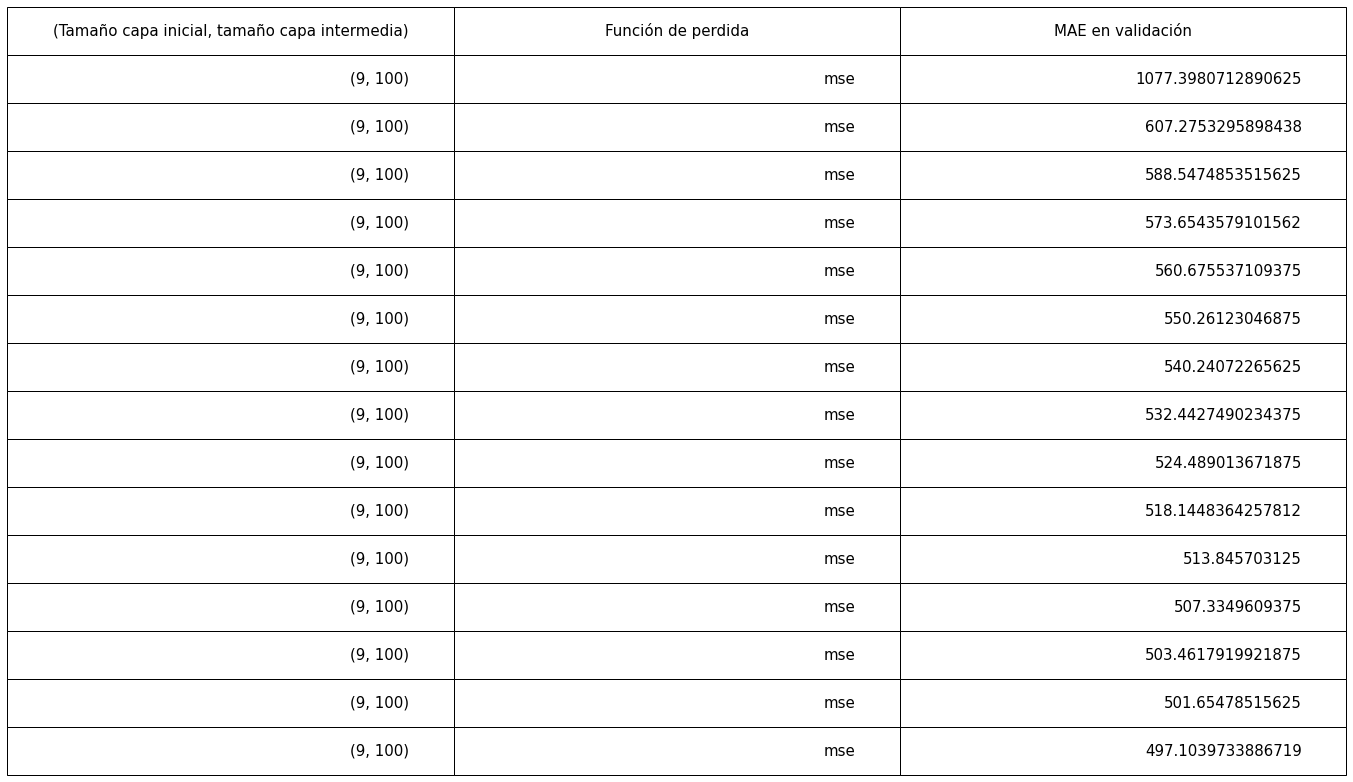

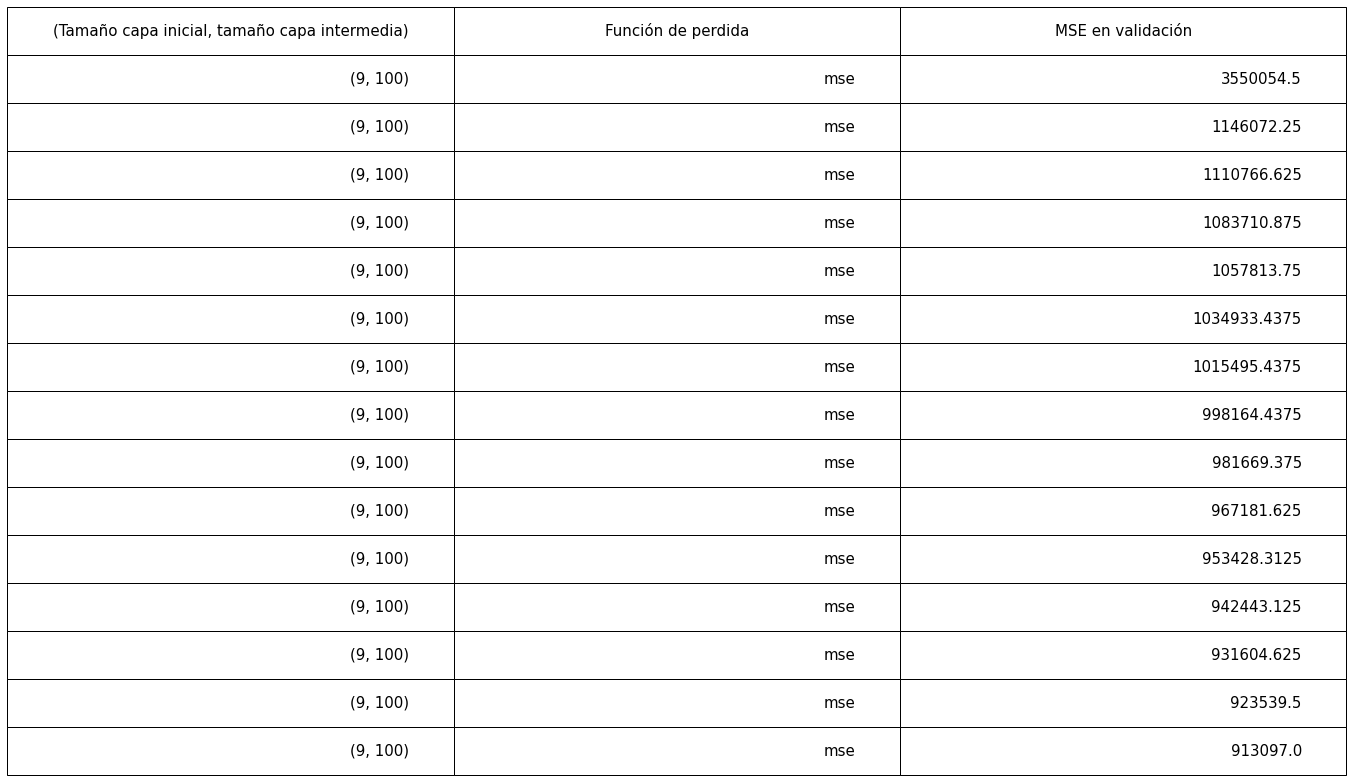

[[3801.]
 [2215.]
 [3941.]
 ...
 [ 915.]
 [ 681.]
 [ 787.]]
[[4751.3813 ]
 [2385.272  ]
 [3654.0254 ]
 ...
 [ 983.66266]
 [ 811.4    ]
 [ 611.5635 ]]


In [ ]:


mlp = Sequential()
mlp.add(Dense(9, input_shape=(X_train.shape[1],), activation='relu'))
mlp.add(Dense(100, activation='relu'))
mlp.add(Dense(1 ,activation='relu'))
mlp.summary()

mlp.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse']) 

print("Fit para training \n")
history_train = mlp.fit(X_train, y_train, epochs=15, batch_size=32, verbose=1)
print("\n Fit para validation \n")
history_val = mlp.fit(X_val, y_val, epochs=15, batch_size=32, verbose=1)

history_train.history['epoch'] = list(range(EPOCHS))

"""haces 2 tablas: una con columnas [(tamaño capa inicial, tamaño capa intermedia),
 función de pérdida, MSE en validación] y otra con columnas [(tamaño capa inicial,
  tamaño capa intermedia), función de pérdida, MAE en validación]
  """
def plot_table_mae(string_capas):
  fig, ax =plt.subplots(1,1)
  columns = ('(Tamaño capa inicial, tamaño capa intermedia)', 'Función de perdida', 'MAE en validación')
  data = []
  for mae in list(history_val.history['mae']):
    row = [string_capas, "mse", mae]
    data.append(row)
  ax.axis('tight')
  ax.axis('off')
  table = ax.table(cellText=data, colLabels=columns,loc='center')
  table.set_fontsize(27)
  table.scale(4, 4) 
  plt.show()

def plot_table_mse(string_capas):
  fig, ax =plt.subplots(1,1)
  columns = ('(Tamaño capa inicial, tamaño capa intermedia)', 'Función de perdida', 'MSE en validación')
  data = []
  for mse in list(history_val.history['mse']):
    row = [string_capas, "mse", mse]
    data.append(row)
  ax.axis('tight')
  ax.axis('off')
  table = ax.table(cellText=data, colLabels=columns,loc='center')
  table.set_fontsize(27)
  table.scale(4, 4) 
  plt.show()


plot_table_mae("(9, 100)")
plot_table_mse("(9, 100)")

validation_predictions = mlp.predict(X_val)
print(y_val.values)
print(validation_predictions)


2.
Parametros:


*   Nº neuronas capa de input: 9
*   Nº neuronas capa oculta: 20
*   Funciones de activación (input-capa oculta-output): tanh-tanh-tanh



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_10 (Dense)             (None, 20)                200       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 21        
Total params: 311
Trainable params: 311
Non-trainable params: 0
_________________________________________________________________
Fit para training 

Epoch 1/15
1170/1170 [==============================] - 2s 1ms/step - loss: 31478597.4740 - mae: 3954.2101 - mse: 31478597.4740
Epoch 2/15
1170/1170 [==============================] - 2s 1ms/step - loss: 31648125.9880 - mae: 3947.7895 - mse: 31648125.9880
Epoch 3/15
1170/1170 [==============================] - 2s 1ms/step - loss: 31556787.9009 - mae: 3951.9257 - m

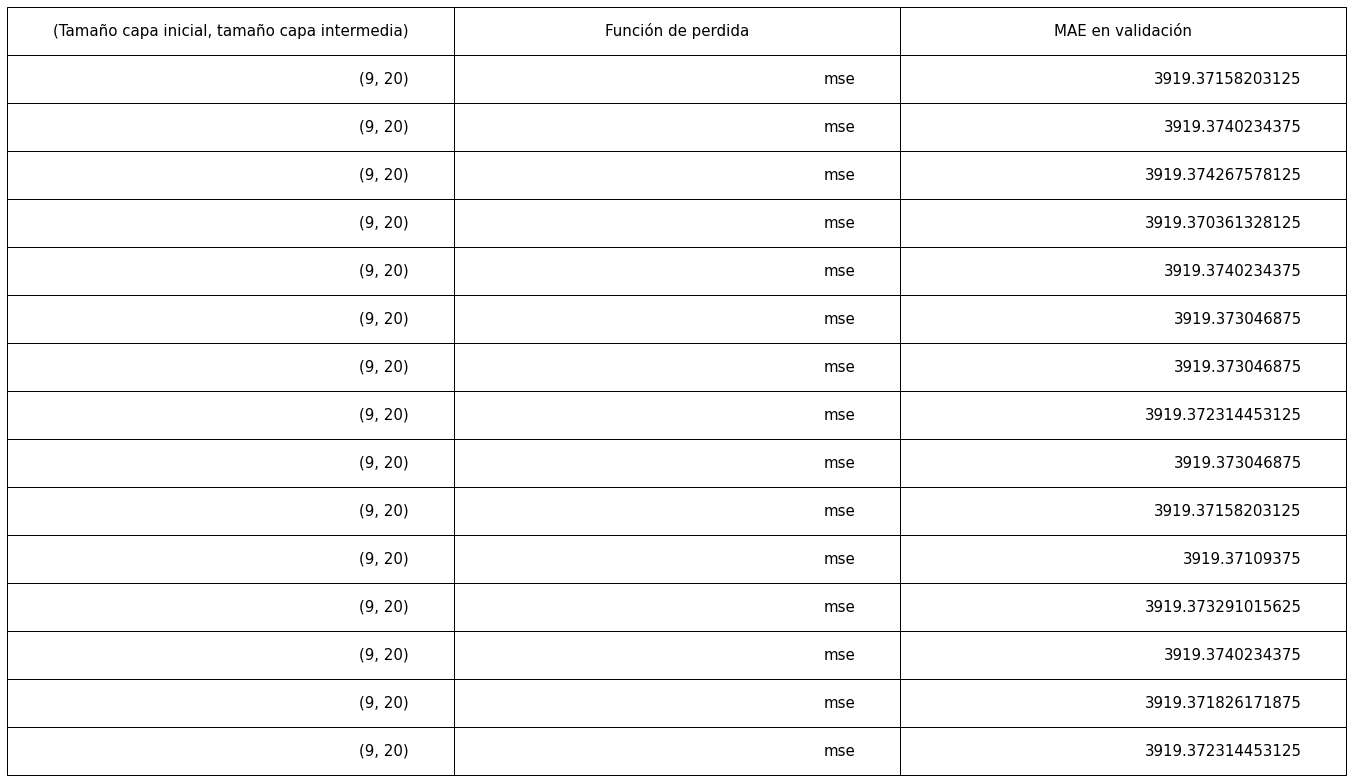

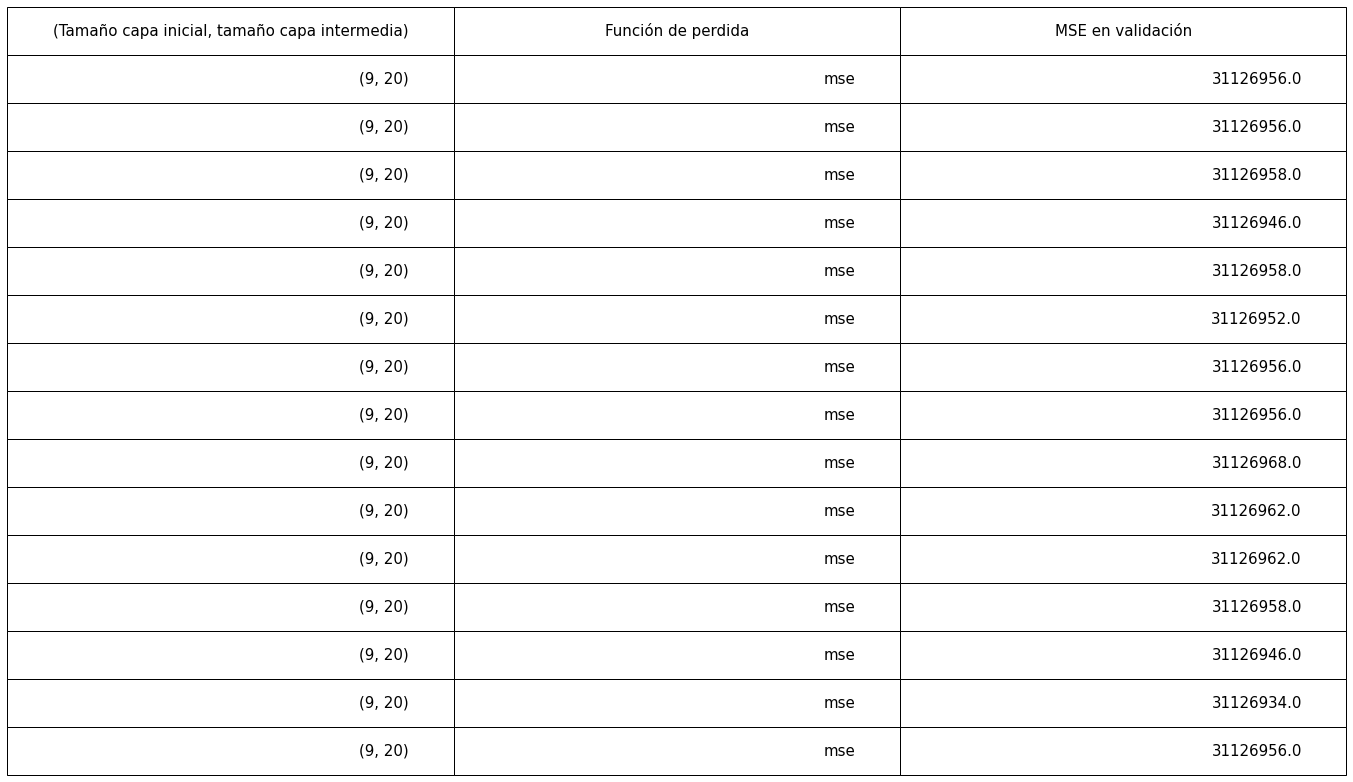

[[3801.]
 [2215.]
 [3941.]
 ...
 [ 915.]
 [ 681.]
 [ 787.]]
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [ ]:
mlp = Sequential()
mlp.add(Dense(9, input_shape=(X_train.shape[1],), activation='tanh'))
mlp.add(Dense(20, activation='tanh'))
mlp.add(Dense(1 ,activation='tanh'))
mlp.summary()

mlp.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse']) 

print("Fit para training \n")
history_train = mlp.fit(X_train, y_train, epochs=15, batch_size=32, verbose=1)
print("\n Fit para validation \n")
history_val = mlp.fit(X_val, y_val, epochs=15, batch_size=32, verbose=1)

plot_table_mae("(9, 20)")
plot_table_mse("(9, 20)")

validation_predictions = mlp.predict(X_val)

3.

Parametros:


*   Nº neuronas capa de input: 9
*   Nº neuronas capa oculta: 300
*   Funciones de activación (input-capa oculta-output): sigmoid-sigmoid-sigmoid



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_4 (Dense)              (None, 300)               3000      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 301       
Total params: 3,391
Trainable params: 3,391
Non-trainable params: 0
_________________________________________________________________
Fit para training 

Epoch 1/15
1170/1170 [==============================] - 3s 2ms/step - loss: 31942460.7771 - mae: 3974.5307 - mse: 31942460.7771
Epoch 2/15
1170/1170 [==============================] - 3s 2ms/step - loss: 30842772.4253 - mae: 3896.5729 - mse: 30842772.4253
Epoch 3/15
1170/1170 [==============================] - 3s 2ms/step - loss: 31995881.9761 - mae: 3976.3468

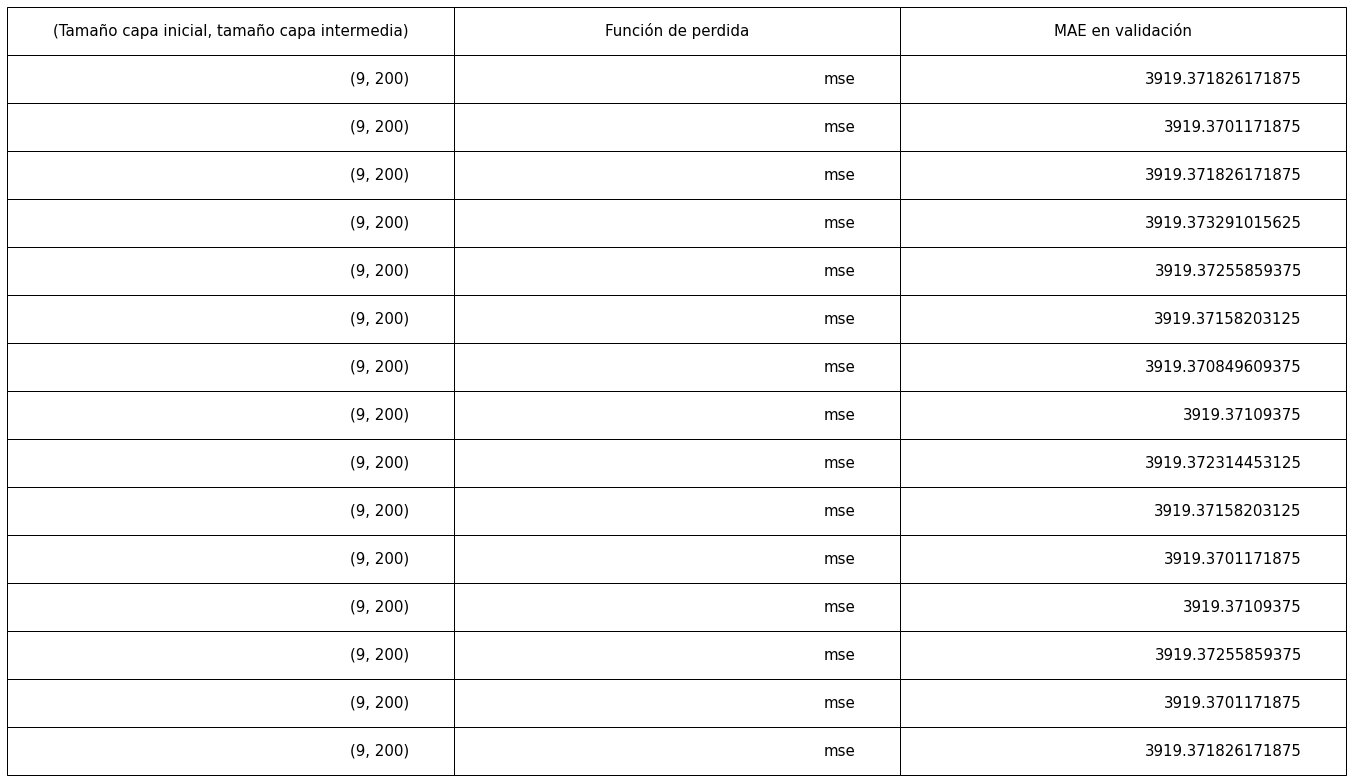

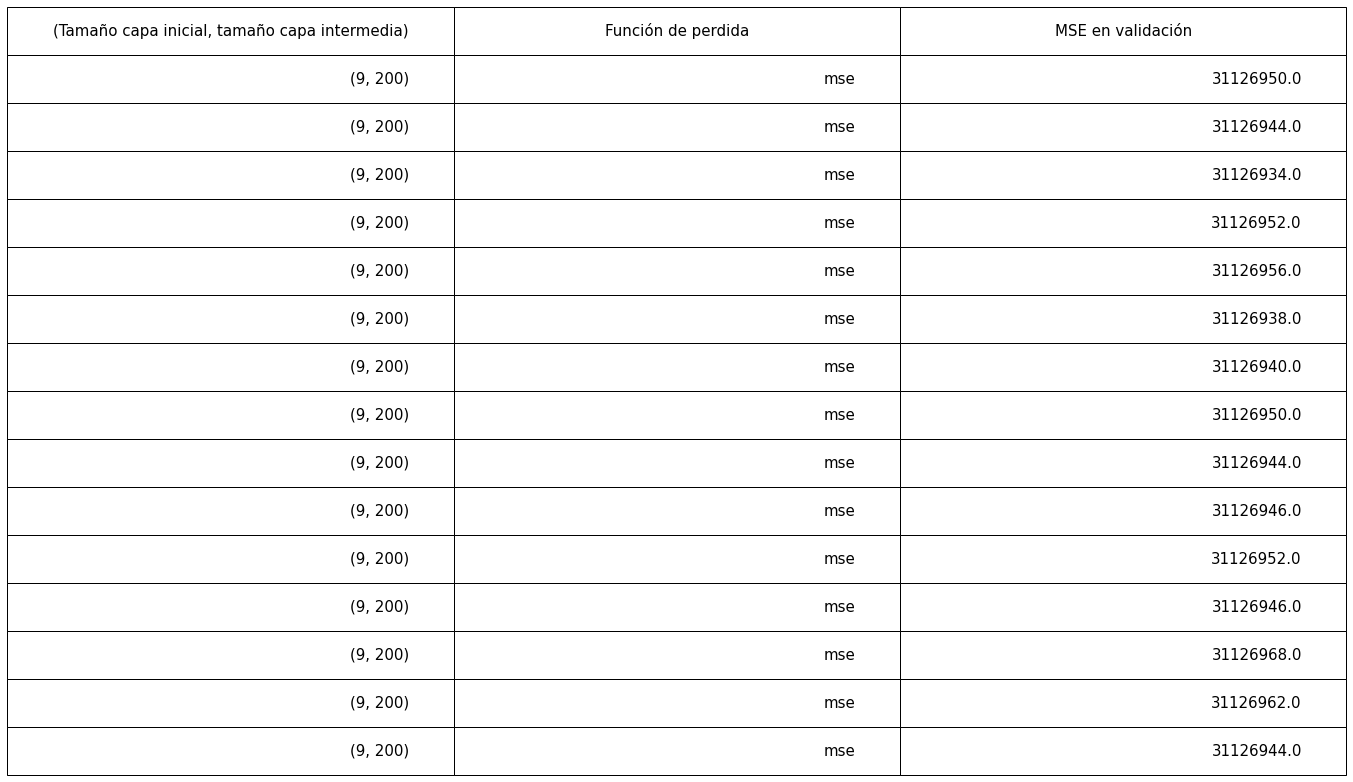

[[3801.]
 [2215.]
 [3941.]
 ...
 [ 915.]
 [ 681.]
 [ 787.]]
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [ ]:
mlp = Sequential()
mlp.add(Dense(9, input_shape=(X_train.shape[1],), activation='sigmoid'))
mlp.add(Dense(300, activation='sigmoid'))
mlp.add(Dense(1 ,activation='sigmoid'))
mlp.summary()

mlp.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse']) 

print("Fit para training \n")
history_train = mlp.fit(X_train, y_train, epochs=15, batch_size=32, verbose=1)
print("\n Fit para validation \n")
history_val = mlp.fit(X_val, y_val, epochs=15, batch_size=32, verbose=1)

plot_table_mae("(9, 200)")
plot_table_mse("(9, 200)")

validation_predictions = mlp.predict(X_val)
print(y_val.values)
print(validation_predictions)

4.

Parametros:


*   Nº neuronas capa de input: 9
*   Nº neuronas capa oculta: 200
*   Funciones de activación (input-capa oculta-output): relu-relu-relu


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_7 (Dense)              (None, 200)               2000      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 201       
Total params: 2,291
Trainable params: 2,291
Non-trainable params: 0
_________________________________________________________________
Fit para training 

Epoch 1/15
1170/1170 [==============================] - 4s 2ms/step - loss: 27061746.6456 - mae: 3544.8481 - mse: 27061746.6456
Epoch 2/15
1170/1170 [==============================] - 3s 2ms/step - loss: 13120668.7208 - mae: 2770.4416 - mse: 13120668.7208
Epoch 3/15
1170/1170 [==============================] - 3s 2ms/step - loss: 10587192.2519 - mae: 2477.3023

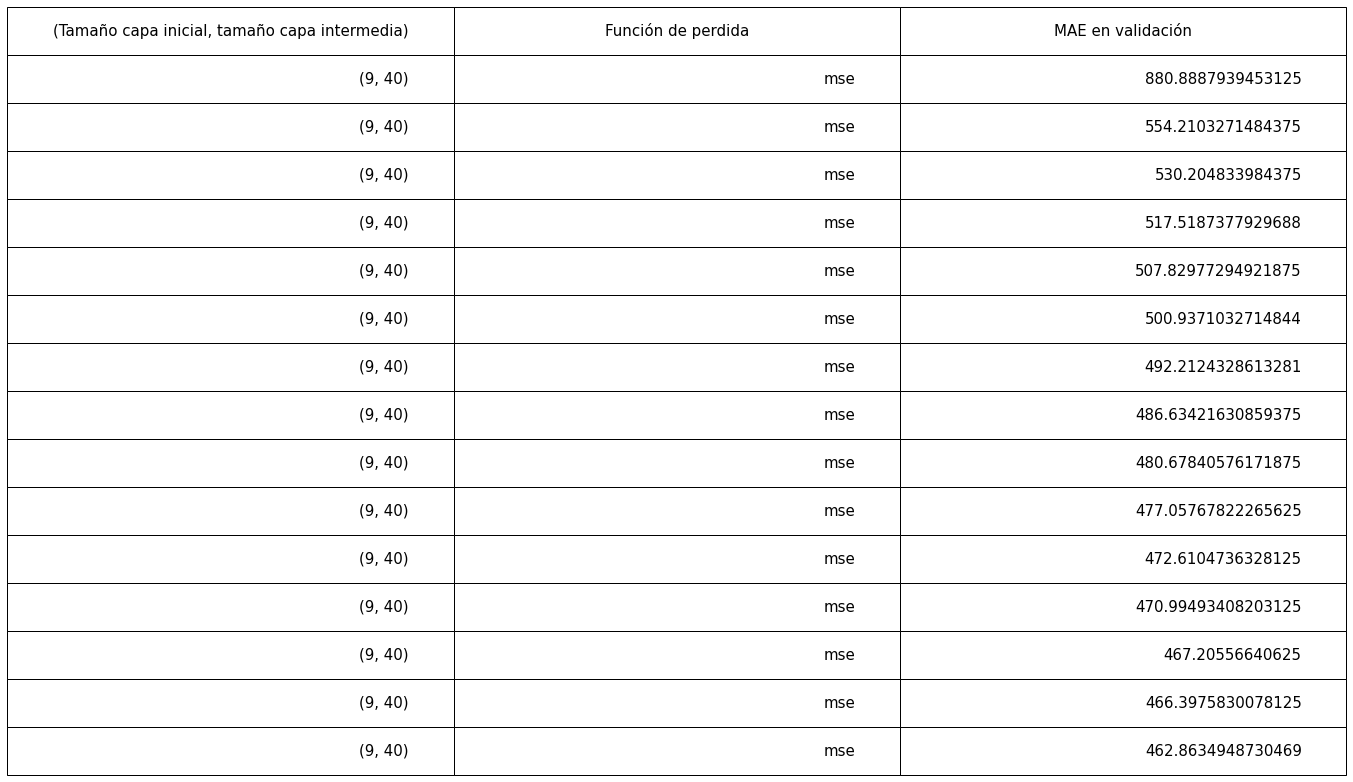

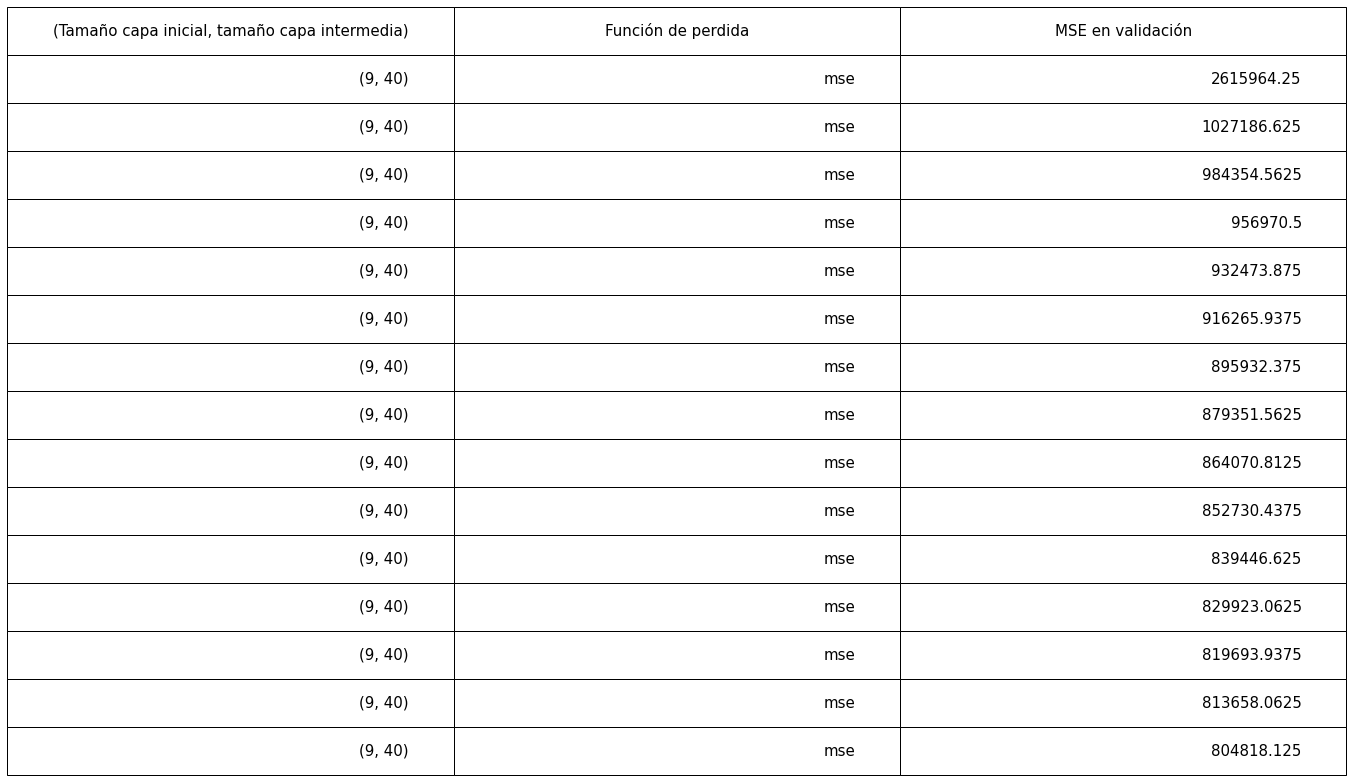

[[3801.]
 [2215.]
 [3941.]
 ...
 [ 915.]
 [ 681.]
 [ 787.]]
[[4586.6353 ]
 [1737.079  ]
 [3379.3784 ]
 ...
 [ 877.512  ]
 [ 739.62787]
 [ 667.6305 ]]


In [ ]:
mlp = Sequential()
mlp.add(Dense(9, input_shape=(X_train.shape[1],), activation='relu'))
mlp.add(Dense(200, activation='relu'))
mlp.add(Dense(1 ,activation='relu'))
mlp.summary()

mlp.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse']) 

print("Fit para training \n")
history_train = mlp.fit(X_train, y_train, epochs=15, batch_size=32, verbose=1)
print("\n Fit para validation \n")
history_val = mlp.fit(X_val, y_val, epochs=15, batch_size=32, verbose=1)

plot_table_mae("(9, 40)")
plot_table_mse("(9, 40)")

validation_predictions = mlp.predict(X_val)
print(y_val.values)
print(validation_predictions)

5.

Parametros:


*   Nº neuronas capa de input: 9
*   Nº neuronas capa oculta: 10
*   Funciones de activación (input-capa oculta-output): tanh-tanh-tanh

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_16 (Dense)             (None, 10)                100       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 11        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________
Fit para training 

Epoch 1/15
1170/1170 [==============================] - 3s 2ms/step - loss: 31841617.1597 - mae: 3958.6059 - mse: 31841617.1597
Epoch 2/15
1170/1170 [==============================] - 3s 2ms/step - loss: 31532685.7865 - mae: 3947.0077 - mse: 31532685.7865
Epoch 3/15
1170/1170 [==============================] - 3s 2ms/step - loss: 31229421.2400 - mae: 3925.3106 - m

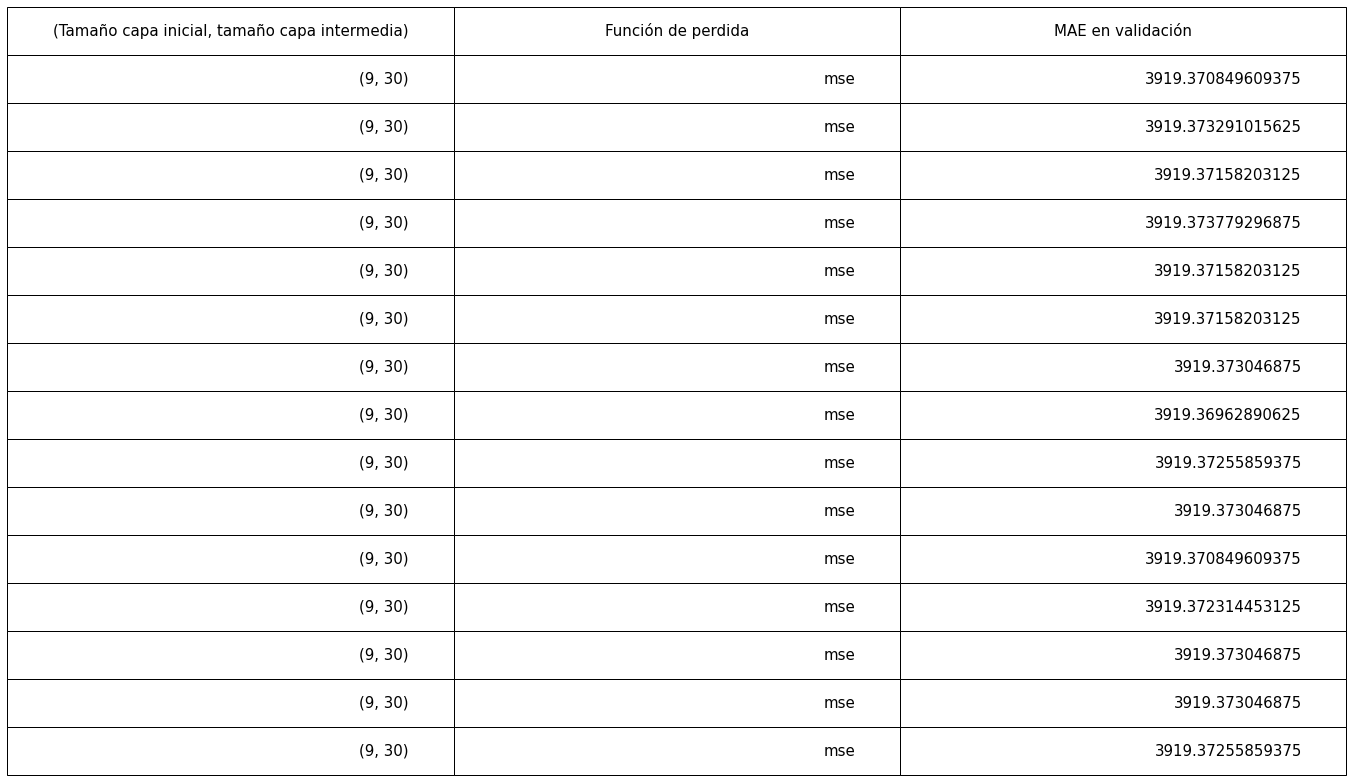

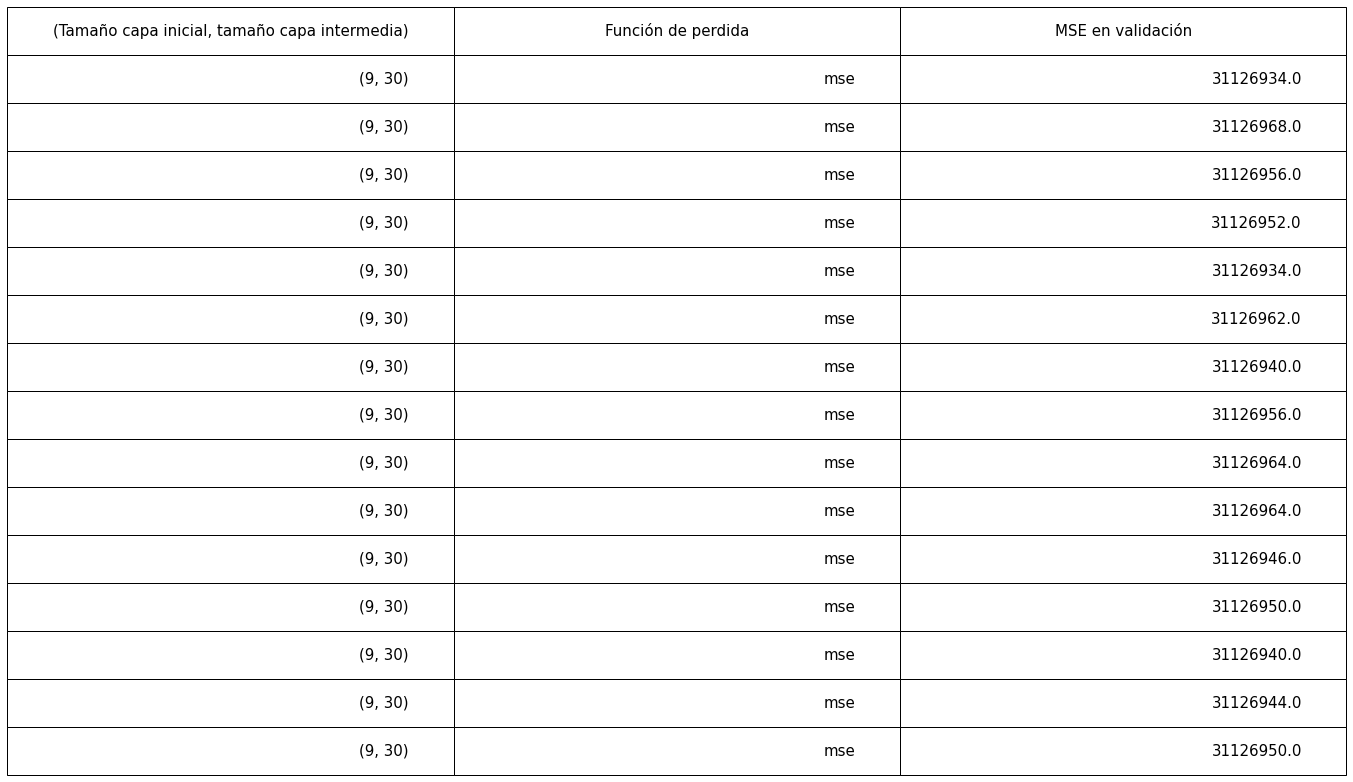

[[3801.]
 [2215.]
 [3941.]
 ...
 [ 915.]
 [ 681.]
 [ 787.]]
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [ ]:
mlp = Sequential()
mlp.add(Dense(9, input_shape=(X_train.shape[1],), activation='tanh'))
mlp.add(Dense(10, activation='tanh'))
mlp.add(Dense(1 ,activation='tanh'))
mlp.summary()

mlp.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse']) 

print("Fit para training \n")
history_train = mlp.fit(X_train, y_train, epochs=15, batch_size=32, verbose=1)
print("\n Fit para validation \n")
history_val = mlp.fit(X_val, y_val, epochs=15, batch_size=32, verbose=1)

plot_table_mae("(9, 30)")
plot_table_mse("(9, 30)")

validation_predictions = mlp.predict(X_val)
print(y_val.values)
print(validation_predictions)

# Tablas de 5x3

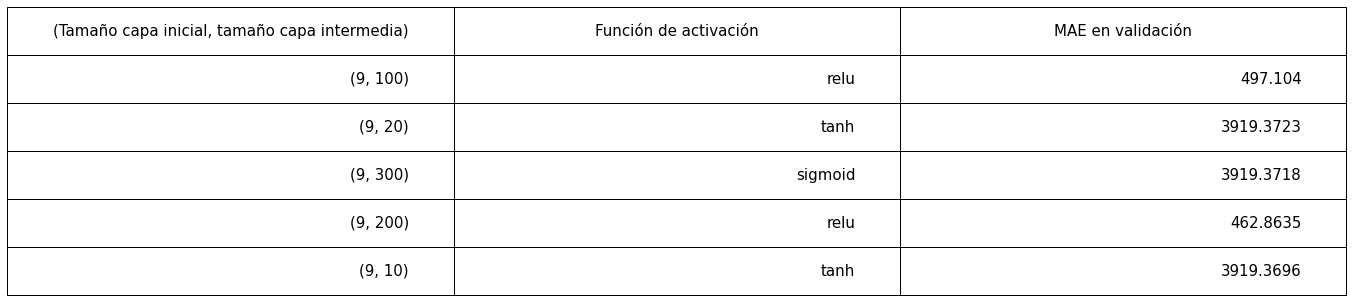

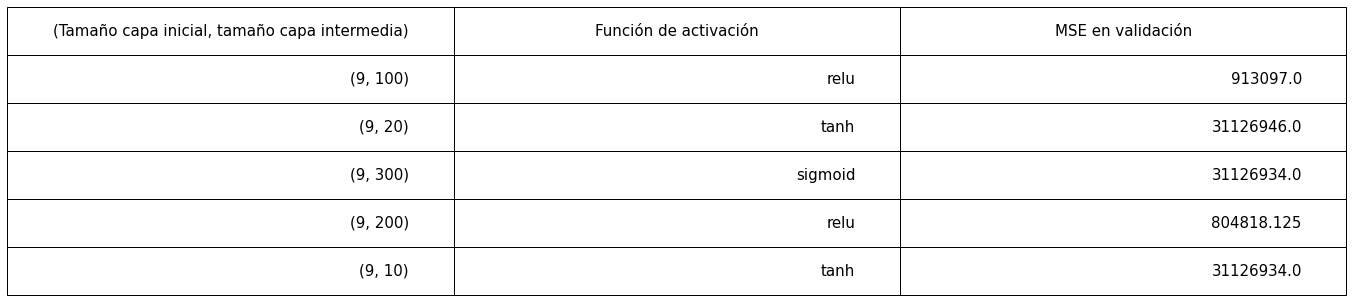

In [ ]:
def plot_table_mae():
  fig, ax =plt.subplots(1,1)
  columns = ('(Tamaño capa inicial, tamaño capa intermedia)', 'Función de activación', 'MAE en validación')
  data = [['(9, 100)', "relu", 497.1040],['(9, 20)', "tanh", 3919.3723],['(9, 300)', "sigmoid", 3919.3718], ['(9, 200)', "relu", 462.8635],['(9, 10)', "tanh", 3919.3696] ]
  ax.axis('tight')
  ax.axis('off')
  table = ax.table(cellText=data, colLabels=columns,loc='center')
  table.set_fontsize(27)
  table.scale(4, 4) 
  plt.show()

def plot_table_mse():
  fig, ax =plt.subplots(1,1)
  columns = ('(Tamaño capa inicial, tamaño capa intermedia)', 'Función de activación', 'MSE en validación')
  data = [['(9, 100)', "relu", 913097.0000],['(9, 20)', "tanh", 31126946.0000],['(9, 300)', "sigmoid", 31126934.0000], ['(9, 200)', "relu", 804818.1250],['(9, 10)', "tanh", 31126934.0000] ]
  ax.axis('tight')
  ax.axis('off')
  table = ax.table(cellText=data, colLabels=columns,loc='center')
  table.set_fontsize(27)
  table.scale(4, 4) 
  plt.show()

plot_table_mae()
plot_table_mse()


# Mejor Modelo:

Parametros:


*   Nº neuronas capa de input: 9
*   Nº neuronas capa oculta: 200
*   Funciones de activación (input-capa oculta-output): relu-relu-relu

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_19 (Dense)             (None, 200)               2000      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 201       
Total params: 2,291
Trainable params: 2,291
Non-trainable params: 0
_________________________________________________________________
Fit para training 

Epoch 1/15
1170/1170 [==============================] - 3s 2ms/step - loss: 26090199.3100 - mae: 3489.0399 - mse: 26090199.3100
Epoch 2/15
1170/1170 [==============================] - 3s 2ms/step - loss: 12861816.9394 - mae: 2747.3091 - mse: 12861816.9394
Epoch 3/15
1170/1170 [==============================] - 3s 2ms/step - loss: 10122827.2280 - mae: 2421.6351

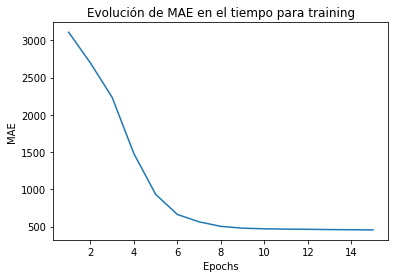

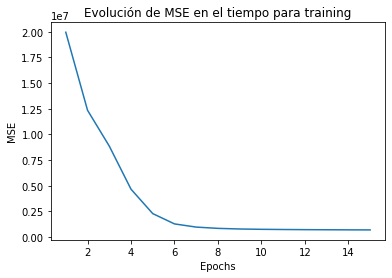

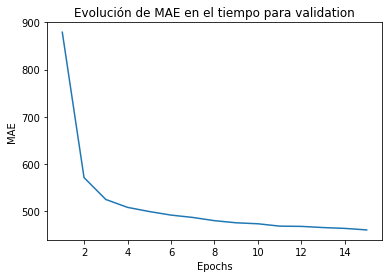

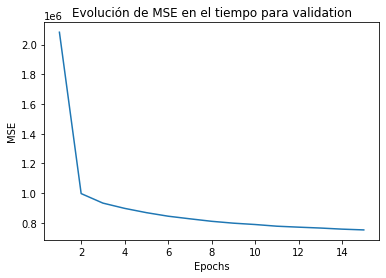

In [ ]:
mlp = Sequential()
mlp.add(Dense(9, input_shape=(X_train.shape[1],), activation='relu'))
mlp.add(Dense(200, activation='relu'))
mlp.add(Dense(1 ,activation='relu'))
mlp.summary()

mlp.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse']) 

print("Fit para training \n")
history_train = mlp.fit(X_train, y_train, epochs=15, batch_size=32, verbose=1)
print("\n Fit para validation \n")
history_val = mlp.fit(X_val, y_val, epochs=15, batch_size=32, verbose=1)

test_predictions = mlp.predict(X_test)

def plot_training_mae_graph():
  x_axis = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
  mae_data = []
  for mae in list(history_train.history['mae']):
    mae_data.append(mae)
  plt.plot(x_axis, mae_data, label = "MAE")
  plt.xlabel('Epochs')
  plt.ylabel('MAE')
  plt.title('Evolución de MAE en el tiempo para training')
  plt.show()

def plot_training_mse_graph():
  x_axis = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
  mse_data = []
  for mse in list(history_train.history['mse']):
    mse_data.append(mse)
  plt.plot(x_axis, mse_data, label = "MSE")
  plt.xlabel('Epochs')
  plt.ylabel('MSE')
  plt.title('Evolución de MSE en el tiempo para training')
  plt.show()

def plot_validation_mae_graph():
  x_axis = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
  mae_data = []
  for mae in list(history_val.history['mae']):
    mae_data.append(mae)
  plt.plot(x_axis, mae_data, label = "MAE")
  plt.xlabel('Epochs')
  plt.ylabel('MAE')
  plt.title('Evolución de MAE en el tiempo para validation')
  plt.show()

def plot_validation_mse_graph():
  x_axis = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
  mse_data = []
  for mse in list(history_val.history['mse']):
    mse_data.append(mse)
  plt.plot(x_axis, mse_data, label = "MSE")
  plt.xlabel('Epochs')
  plt.ylabel('MSE')
  plt.title('Evolución de MSE en el tiempo para validation')
  plt.show()

plot_training_mae_graph()
plot_training_mse_graph()

plot_validation_mae_graph()
plot_validation_mse_graph()


¿Como se correlaciona, con cada métrica, los resultados de los sets de entrenamiento y validación?:
Se puede apreciar que en cuanto a la evolución de ambas metricas MAE Y MSE para training y validation siguen una curva muy parecida. En el caso de la evolución de las metricas del set de training se puede ver una reducción de las metricas mas gradual que en el set de validación y esto se debe al número de datos bstante mayor que tiene el dataframe de training en comparado con el de validación.

Se puede apreciar tambien para ambas metricas y ambos dataframes que la evolución comienza con una pendiente negativa empinada y luego tiende a convertirce en una pendiente negativa cercana a una curva horizontal. En el caso del training set la evolución hacia una curva mas horizontal es mas gradual y toma mas epochs y, como se menciono anteriormente, esto se debe a el gran número de datos con los que se entrena. En cuanto al set de validación la curva tiene a una curva horizontal con mayor rapidez o mejor dicho con la necesidad de menos epochs y, esto se debe como se mencionó anteriormente al reducio numero de datos con que este modelo se entrena.

Podemos apreciar también que por lo menos en la evolución de la metricas del fit del set de training, existe una epoch en donde las metricas subsiguientes no mejoran de manera substancial, por lo que se podría reducir el entrenamiento hasta esa epoch la cual podría sel 8.




#Pregunta 4

# Estudio de hiperparametros y capas ocultas

1.

Hiperparametros:

*   Nº capas ocultas: 2
*   Nº neuronas primera capa oculta: 100
*   Nº neuronas segunda capa oculta: 100

In [ ]:
mlp = Sequential()
mlp.add(Dense(9, input_shape=(X_train.shape[1],), activation='relu'))
mlp.add(Dense(100, activation='relu'))
mlp.add(Dense(100, activation='relu'))
mlp.add(Dense(200, activation='relu'))
mlp.add(Dense(1 ,activation='relu'))
mlp.summary()

mlp.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse']) 

print("Fit para training \n")
history_train = mlp.fit(X_train, y_train, epochs=15, batch_size=32, verbose=1)
print("\n Fit para validation \n")
history_val = mlp.fit(X_val, y_val, epochs=15, batch_size=32, verbose=1)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_22 (Dense)             (None, 100)               1000      
_________________________________________________________________
dense_23 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_24 (Dense)             (None, 200)               20200     
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 201       
Total params: 31,591
Trainable params: 31,591
Non-trainable params: 0
_________________________________________________________________
Fit para training 

Epoch 1/15
1170/1170 [==============================] - 4s 2ms/step - loss: 16504893.9300 - mae:

2.

Hiperparametros:

*   Nº capas ocultas: 3
*   Nº neuronas primera capa oculta: 200
*   Nº neuronas segunda capa oculta: 200
*   Nº neuronas tercera capa oculta: 200

In [ ]:
mlp = Sequential()
mlp.add(Dense(9, input_shape=(X_train.shape[1],), activation='relu'))
mlp.add(Dense(200, activation='relu'))
mlp.add(Dense(200, activation='relu'))
mlp.add(Dense(200, activation='relu'))
mlp.add(Dense(200, activation='relu'))
mlp.add(Dense(1 ,activation='relu'))
mlp.summary()

mlp.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse']) 

print("Fit para training \n")
history_train = mlp.fit(X_train, y_train, epochs=15, batch_size=32, verbose=1)
print("\n Fit para validation \n")
history_val = mlp.fit(X_val, y_val, epochs=15, batch_size=32, verbose=1)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_27 (Dense)             (None, 200)               2000      
_________________________________________________________________
dense_28 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_29 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_30 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 201       
Total params: 122,891
Trainable params: 122,891
Non-trainable params: 0
________________________________________________

3.

Hiperparametros:

*   Nº capas ocultas: 5
*   Nº neuronas primera capa oculta: 400
*   Nº neuronas segunda capa oculta: 400
*   Nº neuronas tercera capa oculta: 400
*   Nº neuronas cuarta capa oculta: 400
*   Nº neuronas quinta capa oculta: 400

In [ ]:
mlp = Sequential()
mlp.add(Dense(9, input_shape=(X_train.shape[1],), activation='relu'))
mlp.add(Dense(400, activation='relu'))
mlp.add(Dense(400, activation='relu'))
mlp.add(Dense(400, activation='relu'))
mlp.add(Dense(400, activation='relu'))
mlp.add(Dense(400, activation='relu'))
mlp.add(Dense(200, activation='relu'))
mlp.add(Dense(1 ,activation='relu'))
mlp.summary()

mlp.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse']) 

print("Fit para training \n")
history_train = mlp.fit(X_train, y_train, epochs=15, batch_size=32, verbose=1)
print("\n Fit para validation \n")
history_val = mlp.fit(X_val, y_val, epochs=15, batch_size=32, verbose=1)


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_33 (Dense)             (None, 400)               4000      
_________________________________________________________________
dense_34 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_35 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_36 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_37 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_38 (Dense)             (None, 200)              

4.

Hiperparametros:

*   Nº capas ocultas: 5
*   Nº neuronas primera capa oculta: 100
*   Nº neuronas segunda capa oculta: 100
*   Nº neuronas tercera capa oculta: 100
*   Nº neuronas cuarta capa oculta: 100
*   Nº neuronas quinta capa oculta: 100

In [ ]:
mlp = Sequential()
mlp.add(Dense(9, input_shape=(X_train.shape[1],), activation='relu'))
mlp.add(Dense(100, activation='relu'))
mlp.add(Dense(100, activation='relu'))
mlp.add(Dense(100, activation='relu'))
mlp.add(Dense(100, activation='relu'))
mlp.add(Dense(100, activation='relu'))
mlp.add(Dense(200, activation='relu'))
mlp.add(Dense(1 ,activation='relu'))
mlp.summary()

mlp.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse']) 

print("Fit para training \n")
history_train = mlp.fit(X_train, y_train, epochs=15, batch_size=32, verbose=1)
print("\n Fit para validation \n")
history_val = mlp.fit(X_val, y_val, epochs=15, batch_size=32, verbose=1)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_41 (Dense)             (None, 100)               1000      
_________________________________________________________________
dense_42 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_43 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_44 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_45 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_46 (Dense)             (None, 200)             

5.

Hiperparametros:

*   Nº capas ocultas: 1
*   Nº neuronas primera capa oculta: 100

In [ ]:
mlp = Sequential()
mlp.add(Dense(9, input_shape=(X_train.shape[1],), activation='relu'))
mlp.add(Dense(100, activation='relu'))
mlp.add(Dense(200, activation='relu'))
mlp.add(Dense(1 ,activation='relu'))
mlp.summary()

mlp.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse']) 

print("Fit para training \n")
history_train = mlp.fit(X_train, y_train, epochs=15, batch_size=32, verbose=1)
print("\n Fit para validation \n")
history_val = mlp.fit(X_val, y_val, epochs=15, batch_size=32, verbose=1)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_49 (Dense)             (None, 100)               1000      
_________________________________________________________________
dense_50 (Dense)             (None, 200)               20200     
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 201       
Total params: 21,491
Trainable params: 21,491
Non-trainable params: 0
_________________________________________________________________
Fit para training 

Epoch 1/15
1170/1170 [==============================] - 3s 2ms/step - loss: 19847835.1093 - mae: 3065.1422 - mse: 19847835.1093
Epoch 2/15
1170/1170 [==============================] - 3s 2ms/step - loss: 1418625.4714 - mae: 711

6.

Hiperparametros:

*   Nº capas ocultas: 3
*   Nº neuronas primera capa oculta: 20
*   Nº neuronas segunda capa oculta: 20
*   Nº neuronas tercera capa oculta: 20

In [ ]:
mlp = Sequential()
mlp.add(Dense(9, input_shape=(X_train.shape[1],), activation='relu'))
mlp.add(Dense(20, activation='relu'))
mlp.add(Dense(20, activation='relu'))
mlp.add(Dense(20, activation='relu'))
mlp.add(Dense(200, activation='relu'))
mlp.add(Dense(1 ,activation='relu'))
mlp.summary()

mlp.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse']) 

print("Fit para training \n")
history_train = mlp.fit(X_train, y_train, epochs=15, batch_size=32, verbose=1)
print("\n Fit para validation \n")
history_val = mlp.fit(X_val, y_val, epochs=15, batch_size=32, verbose=1)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_53 (Dense)             (None, 20)                200       
_________________________________________________________________
dense_54 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_55 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_56 (Dense)             (None, 200)               4200      
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 201       
Total params: 5,531
Trainable params: 5,531
Non-trainable params: 0
___________________________________________________

# Modelo con mejores metricas:
Hiperparametros:

*   Nº capas ocultas: 5
*   Nº neuronas primera capa oculta: 100
*   Nº neuronas segunda capa oculta: 100
*   Nº neuronas tercera capa oculta: 100
*   Nº neuronas cuarta capa oculta: 100
*   Nº neuronas quinta capa oculta: 100



Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_284 (Dense)            (None, 9)                 90        
_________________________________________________________________
dense_285 (Dense)            (None, 100)               1000      
_________________________________________________________________
dense_286 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_287 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_288 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_289 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_290 (Dense)            (None, 200)             

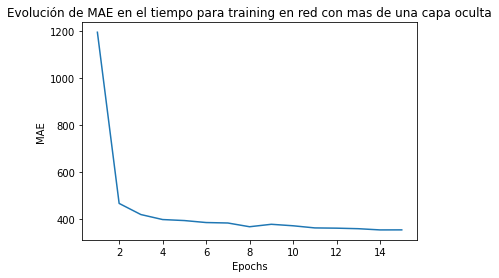

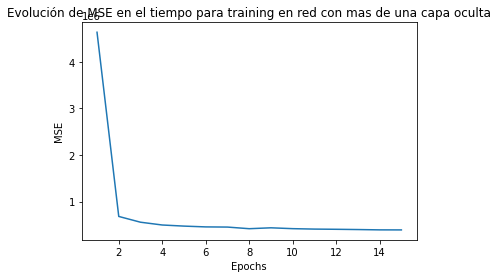

R^2: 0.47222836127845125


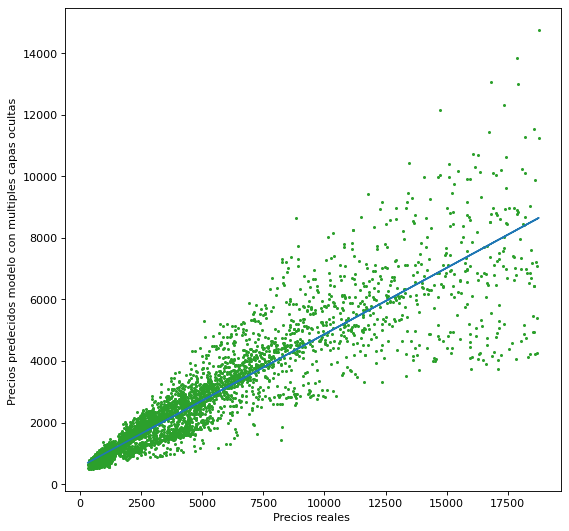

In [ ]:
from sklearn.metrics import r2_score

mlp = Sequential()
mlp.add(Dense(9, input_shape=(X_train.shape[1],), activation='relu'))
mlp.add(Dense(100, activation='relu'))
mlp.add(Dense(100, activation='relu'))
mlp.add(Dense(100, activation='relu'))
mlp.add(Dense(100, activation='relu'))
mlp.add(Dense(100, activation='relu'))
mlp.add(Dense(200, activation='relu'))
mlp.add(Dense(1 ,activation='relu'))
mlp.summary()

mlp.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse']) 

history = mlp.fit(X_train, y_train, epochs=15, batch_size=32, verbose=1)

test_predictions = mlp.predict(X_test)

def plot_training_mae_graph():
  x_axis = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
  mae_data = []
  for mae in list(history.history['mae']):
    mae_data.append(mae)
  plt.plot(x_axis, mae_data, label = "MAE")
  plt.xlabel('Epochs')
  plt.ylabel('MAE')
  plt.title('Evolución de MAE en el tiempo para training en red con mas de una capa oculta')
  plt.show()

def plot_training_mse_graph():
  x_axis = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
  mse_data = []
  for mse in list(history.history['mse']):
    mse_data.append(mse)
  plt.plot(x_axis, mse_data, label = "MSE")
  plt.xlabel('Epochs')
  plt.ylabel('MSE')
  plt.title('Evolución de MSE en el tiempo para training en red con mas de una capa oculta')
  plt.show()

plot_training_mae_graph()
plot_training_mse_graph()

plt.figure(figsize=(8, 8), dpi=80)
x1 = np.array(y_testing['price'].astype(str).astype(int))
y1 = np.array(np.array(test_predictions).ravel())

m, b= np.polyfit(x1, y1, 1)
plt.plot(x1, m*x1+b)
g=plt.scatter(y_testing, test_predictions,s=3, c='#2ca02c')
g.axes.set_xlabel('Precios reales ')
g.axes.set_ylabel('Precios predecidos modelo con multiples capas ocultas ')
print("R^2: {}".format(r2_score(x1, y1)))

Modelo pregunta 3


Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_292 (Dense)            (None, 9)                 90        
_________________________________________________________________
dense_293 (Dense)            (None, 200)               2000      
_________________________________________________________________
dense_294 (Dense)            (None, 1)                 201       
Total params: 2,291
Trainable params: 2,291
Non-trainable params: 0
_________________________________________________________________
Fit para training 

Epoch 1/15
1170/1170 [==============================] - 4s 2ms/step - loss: 26124441.0213 - mae: 3498.6926 - mse: 26124441.0213
Epoch 2/15
1170/1170 [==============================] - 3s 2ms/step - loss: 12754126.1614 - mae: 2733.7035 - mse: 12754126.1614
Epoch 3/15
1170/1170 [==============================] - 3s 2ms/step - loss: 9631443.2993 - mae: 2347.8271

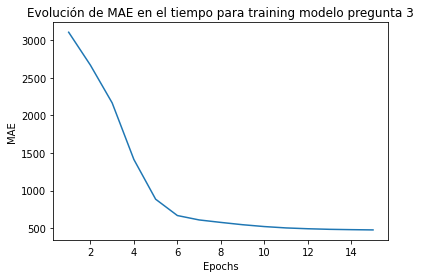

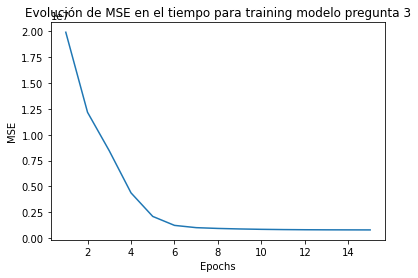

R^2: -1.794648241812998


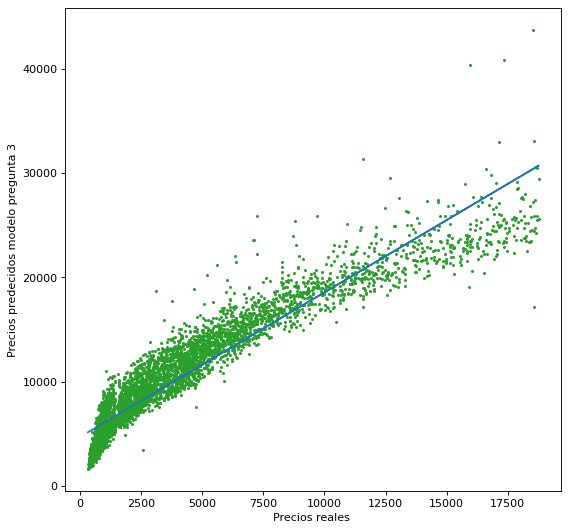

In [ ]:
mlp_first = Sequential()
mlp_first.add(Dense(9, input_shape=(X_train.shape[1],), activation='relu'))
mlp_first.add(Dense(200, activation='relu'))
mlp_first.add(Dense(1 ,activation='relu'))
mlp_first.summary()

mlp_first.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse']) 

print("Fit para training \n")
history_train_first = mlp_first.fit(X_train, y_train, epochs=15, batch_size=32, verbose=1)

test_predictions = mlp_first.predict(X_test)

def plot_training_mae_graph_first():
  x_axis = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
  mae_data = []
  for mae in list(history_train_first.history['mae']):
    mae_data.append(mae)
  plt.plot(x_axis, mae_data, label = "MAE")
  plt.xlabel('Epochs')
  plt.ylabel('MAE')
  plt.title('Evolución de MAE en el tiempo para training modelo pregunta 3')
  plt.show()

def plot_training_mse_graph_first():
  x_axis = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
  mse_data = []
  for mse in list(history_train_first.history['mse']):
    mse_data.append(mse)
  plt.plot(x_axis, mse_data, label = "MSE")
  plt.xlabel('Epochs')
  plt.ylabel('MSE')
  plt.title('Evolución de MSE en el tiempo para training modelo pregunta 3')
  plt.show()

print("\n \n \n")
plot_training_mae_graph_first()
plot_training_mse_graph_first()

plt.figure(figsize=(8, 8), dpi=80)
x1 = np.array(y_testing['price'].astype(str).astype(int))
y1 = np.array(np.array(test_predictions).ravel())

m, b = np.polyfit(x1, y1, 1)
plt.plot(x1, m*x1+b)
n=plt.scatter(y_testing, test_predictions,s=3,c='#2ca02c')
n.axes.set_xlabel('Precios reales ')
n.axes.set_ylabel('Precios predecidos modelo pregunta 3')
print("R^2: {}".format(r2_score(x1, y1)))

Explicación y comparación de los dos modelos:

Grafica y R^2 de mejor modelo con multiples capas ocultas:
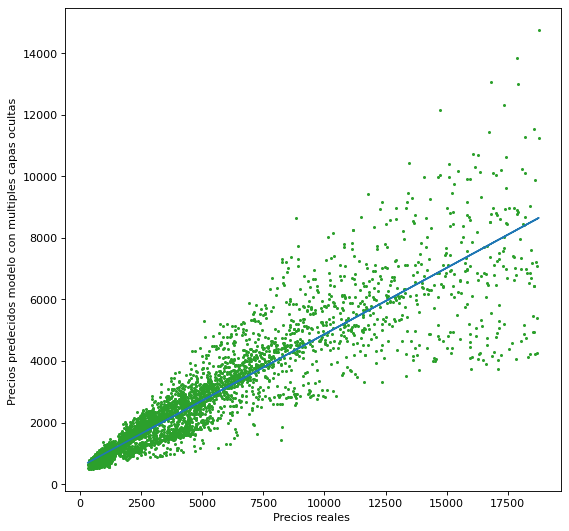
R^2= 0.47222836127845125

Gráfica del mejor modelo de la pregunta 3:
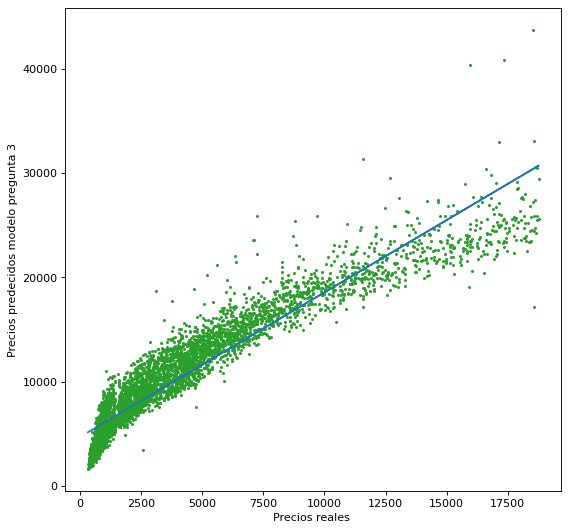

R^2 = -1.794648241812998

Podemos apreciar que el modelo con multiples capas ocultas genera mejores predicciones que el mejor modelo de la prunta 3 ya que la magnitud de su valor de R^2 es menor que el de el modelo de la pregunta 3, es decir, el mejor modelo con multiples capas ocultas representa un goodness-of-fit mejor que el mejor modelo de la pregunta 3. O sea, los datos del mejor modelo de la pregunta 4 estan mas cercanos a su linea generada por la regresión lineal que los datos del mejor modelo de la pregunta 3 con respecto a su linea de la regresión lineal.

El mejor modelo de multiples capas ocultas presenta mejores predicciones que el mejor modelo con una capa oculta ya que este tiene una capacidad mayor para encontrar patrones que ayudan a predecir mejor el precio que el modelo con una capa oculta debido al uso de multiples capas y ultiples neuronas.

#AR - demo

In [ ]:
#Descarga del ambiente (RUN ME!)
%%bash
pip install gym pyvirtualdisplay > /dev/null 2>&1
apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
apt-get update > /dev/null 2>&1
apt-get install cmake > /dev/null 2>&1
pip install --upgrade setuptools 2>&1
pip install ez_setup > /dev/null 2>&1
pip install gym[atari] > /dev/null 2>&1
pip3 install box2d-py

ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: setuptools 57.2.0
    Uninstalling setuptools-57.2.0:
      Successfully uninstalled setuptools-57.2.0


In [ ]:
#@title Importes (RUN ME TOO!)
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

Vamos a inicializar el ambiente

In [ ]:
env = gym.make('CartPole-v1')

Cada vez que se resetea el ambiente se envía una observación del estado en el que inicia la nueva instancia.

In [ ]:
obs = env.reset()
print(obs)

[-0.00418775  0.03375734  0.00403509 -0.04104817]


Estos son los estados de ciertas variables importantes, para el ambiente. En ese caso estamos utilizando el ambiente ```CartPole-v1```. Según la [wiki](https://github.com/openai/gym/wiki/CartPole-v0) del toolkit las observaciones del sistema son: <p>

>Num | Observations | Min | Max
>--- | --- | ---  | ---
>0 | Cart Position | -2.4 | 2.4
>1 | Cart Velocity | -Inf | Inf
>2 | Pole Angle | ~-41.8° | ~41.8°
>3 | Pole Velocity at tip | -Inf | Inf


In [ ]:
print('Su espacio de acciones es', env.action_space)

Su espacio de acciones es Discrete(2)


En pocas palabras

>Num | Action
>--- | --- 
>0 | Push car to left
>1 | Push car to right

Cada vez que se carga el ambiente se inicializa en algún estado aleatorio, con el péndulo en posición vertical. Veamos dos ejemplos.

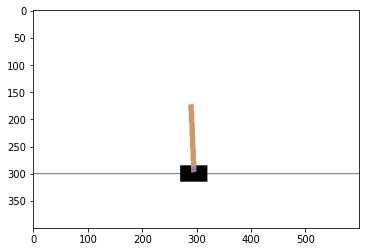

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(env.render(mode='rgb_array'));

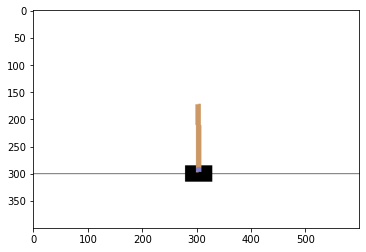

In [ ]:
env.reset()
plt.imshow(env.render(mode='rgb_array'));

La diferencia es sutil, esto pues este ambiente tiene un desafío como diseño. Hay que mantener el péndulo vertical tanto como se pueda. Luego de eso el ambiente termina. <br>
Ambientes como éste se denominan episódicos. Y tienden a funcionar en series de episodios. Muchos juegos caen en esta categoría, juegos de atari como pacman, o incluso juegos analógicos como el ajedrés también son episódicos.<br>
Los episodios de este ambiente terminan si:


*   El ángulo del péndulo es mayor a $\pm 12°$
*   La posición del carro es mayor a $\pm 2.4$
*   El largo del episodio es mayor a 500



Cada ambiente puede enviar una secuencia de acciones aleatorias si se le desea.

In [ ]:
[env.action_space.sample() for _ in range(10)]

[0, 1, 0, 1, 0, 1, 1, 1, 1, 1]

Calculemos cuantas acciones de "ir a la izquierda" puede tomar en promedio el sistema antes de que termine el episodio.

In [ ]:
def actions_till_done(env, action):
    env.reset()
    done = False
    count = 0
    while done == False:
        _, _, done, _, = env.step(action)
        count += 1
    return count
  
# Get an estimate for how many 0 actions you can take on average before the 
# pole falls over
np.mean([actions_till_done(env, 0) for _ in range(100)])

9.5

De la misma manera se puede definir un criterio que calcule la cantidad de recompensas que se pueden obtener por episodio en promedio.

In [ ]:
def average_episodic_return(env, agent, episodes=10, max_steps_per_episode=500):
    episode_rewards = []
    for episode in range(episodes):
        total_rewards = 0
        obs = env.reset()
        for t in range(max_steps_per_episode):
            out = agent(obs) # we don't care about the probabilities here
            assert ("Action" in out), "The key 'Action' was missing from the agents output."
            obs, rew, done, _ = env.step(out["Action"])
            total_rewards += rew
            # check if we are done, if so, exit loop
            if done:
                break
                
        episode_rewards.append(total_rewards)
        
    return {
        "AverageEpisodicReturn": np.mean(episode_rewards), 
        "StandardDeviation":np.sqrt(np.var(episode_rewards))
    }

In [ ]:
def agent_left(observation):
    return {"Action":0}

In [ ]:
average_episodic_return(env, agent_left)

{'AverageEpisodicReturn': 8.9, 'StandardDeviation': 0.7}

De la misma forma que pudimos mostrar una imagen de un estado del agente se puede presentar al agente en una secuencia animada.

In [ ]:
from collections import deque
import matplotlib.animation
import matplotlib.pyplot as plt
%matplotlib inline

def animate_agent(env, agent, max_steps = 400):
    obs = env.reset()
    frames = deque()
    frames.append(env.render(mode='rgb_array'))
    for _ in range(max_steps):
        out = agent(obs)
        assert ("Action" in out), "The key 'Action' was missing from the agents output."
        action = out["Action"]
        obs, _ , done, _ = env.step(action)
        frames.append(env.render(mode='rgb_array'))
        if done:
            break
            
    return animate_frames(frames)

def animate_frames(frames):
    new_height = 2.2
    original_height = frames[0].shape[0]
    original_width = frames[0].shape[1]
    new_width = (new_height / original_height) * original_width
    fig = plt.figure(figsize=(new_width, new_height), dpi = 120)
    
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    patch = ax.imshow(frames[0], aspect='auto', animated=True, interpolation='bilinear')
    animate = lambda i: patch.set_data(frames[i])
    
    ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(frames), interval = 50)
    
    plt.close()
    return HTML(ani.to_jshtml())

¿Cómo se ve el agente cuando se le da la orden de ir siempre a la izquierda?

In [ ]:
def agent_left(observation):
    return {"Action":0}
  
animate_agent(env, agent_left, max_steps = 400)

¿Y si se envía una orden aleatoria para que se mueva a izquierda o derecha?

In [ ]:
def agent_random(observation):
    return {"Action":np.random.choice([0, 1])}

In [ ]:
average_episodic_return(env, agent_random)

{'AverageEpisodicReturn': 18.1, 'StandardDeviation': 4.3}

In [ ]:
animate_agent(env, agent_random)

Podemos definir una función que discretice el valor del estado en caso de que necesitasemos un valor en este dominio.

In [ ]:
def state_for(observation):
    #np.arange(start,stop, step)
    """Returns: arangendarray - Array of evenly spaced values."""
    ranges = [np.arange(-1, 1.25, 0.25), np.arange(-0.3, 0.375, 0.075)[:9], np.arange(-1, 1.25, 0.25)]
    """numpy.zeros(shape, dtype=float, order='C', *, like=None)
Return a new array of given shape and type, filled with zeros."""
    state = np.zeros((3,)) #Ignorando el primer sensor
    #The zip()function returns an iterator of tuples based on the iterable objects.
    #enumerate() method adds a counter to an iterable and returns it in a form of enumerate object.
    for i, (obs, limits) in enumerate(zip(observation[1:], ranges)):
        if obs < limits[0]:
            state[i] = 0
            continue
        for j in range(1, len(limits) - 1):
            if limits[j] <= obs <= limits[j+1]:
                state[i] = j
                break
        if obs > limits[len(limits) - 1]:  
            state[i] = len(limits)

    currstate = 0

    for i in range(3): 
        currstate += state[i] * (10 ** i)

    return int(currstate)


Este es un ejemplo del carro cuando ha sido entrenado correctamente un agente utilizando q learning.

In [ ]:
animate_agent(env, agent)

NameError: ignored

In [ ]:
average_episodic_return(env, agent)

NameError: ignored

#Pregunta 5

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()


env = gym.make('Pendulum-v0')
obs = env.reset()
print(obs)
print("Espacio de observación:",env.observation_space)
print("Espacio de acciones:", env.action_space)
print("\nSe verifica que estos son los espacios de observación y de acciones señalado en el enunciado y lo son.")

[-0.95479728  0.29725773 -0.20838588]
Espacio de observación: Box(-8.0, 8.0, (3,), float32)
Espacio de acciones: Box(-2.0, 2.0, (1,), float32)

Se verifica que estos son los espacios de observación y de acciones señalado en el enunciado y lo son.


Se corren varios episodios y se construyen histogramas con las observaciones de los sensores.

Se corren 1000 episodios y se arman histogramas con los valores del espacio 
 utilizando un agente con una politica que genera acciones aleatorias dentro de su espacio de acciones. 



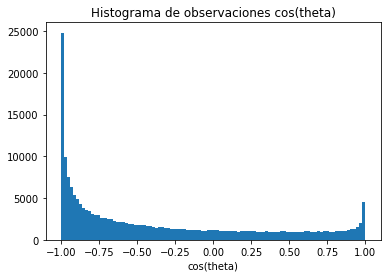

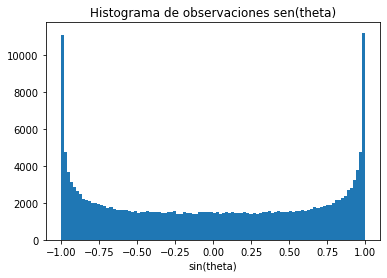

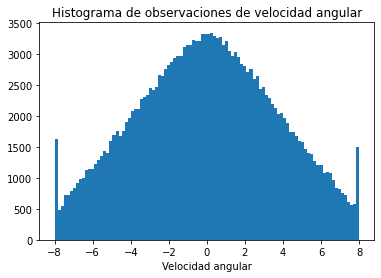

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import random

def agent_random(observation):
    return {"Action":np.random.choice([-2, 2])}

def create_histogram(list_observations, y_label, x_label, title):
  plt.hist(list_observations,bins=100)
  plt.ylabel(y_label)
  plt.xlabel(x_label)
  plt.title(title)
  plt.show()

def run_episodes(env, agent, episodes=1000, max_steps_per_episode=200):
    observaciones_cos = []
    observaciones_sin = []
    observaciones_thetadot = []
    for episode in range(episodes):
        obs = env.reset()
        for t in range(max_steps_per_episode):
            out = agent(obs) # we don't care about the probabilities here
            assert ("Action" in out), "The key 'Action' was missing from the agents output."
            obs, rew, done, _ = env.step([out["Action"]])
            observaciones_cos.append(obs[0])
            observaciones_sin.append(obs[1])
            observaciones_thetadot.append(obs[2])
            # check if we are done, if so, exit loop
            if done:
                break
            # check if we are done, if so, exit loop
    create_histogram(observaciones_cos, "", "cos(theta)", "Histograma de observaciones cos(theta)")
    create_histogram(observaciones_sin, "", "sin(theta)", "Histograma de observaciones sen(theta)") 
    create_histogram(observaciones_thetadot, "", "Velocidad angular", "Histograma de observaciones de velocidad angular")  
print("Se corren 1000 episodios y se arman histogramas con los valores del espacio \n utilizando un agente con una politica que genera acciones aleatorias dentro de su espacio de acciones. \n")
run_episodes(env, agent_random)

In [ ]:
def state_for(observation):
    #np.arange(start,stop, step)
    ranges = [np.arange(-1, 1, 0.1), np.arange(-1, 1, 0.1), np.arange(-8, 8, 0.2)]
    state = np.zeros(3) 
    for i, (obs, limits) in enumerate(zip(observation[1:], ranges)):
        if obs < limits[0]:
            state[i] = -1
            continue
        for j in range(1, len(limits) - 1):
            if limits[j] <= obs <= limits[j+1]:
                state[i] = j
                break
        if obs > limits[len(limits) - 1]:  
            state[i] = 1
    currstate = 0
    for i in range(3): 
        currstate += state[i] * (10 ** i)
    return int(currstate)

def action_for(index):
    #np.arange(start,stop, step)
    ranges = [np.arange(-2, 2, 0.08)]
    action_f = np.zeros(1) 
    for i, (action, limits) in enumerate(zip(index, ranges)):
        if action < limits[0]:
            action_f[i] = -2
            continue
        for j in range(1, len(limits) - 1):
            if limits[j] <= action <= limits[j+1]:
                action_f[i] = j
                break
        if action > limits[len(limits) - 1]:  
            state[i] = 2
    return action_f[0]

#Pregunta 6

In [ ]:
from collections import deque
import matplotlib.animation
import matplotlib.pyplot as plt
%matplotlib inline

print("Se define un agente que tiene una politica de acciones en la que produce \n acciones aleatoria dentro de su espacio posible de acciones.")
def agent(observation):
  discrete_observations =  state_for(observation)
  return {"Action":np.random.choice([-2, 2]), "Observations":discrete_observations}

def animate_frames(frames):
    new_height = 2.2
    original_height = frames[0].shape[0]
    original_width = frames[0].shape[1]
    new_width = (new_height / original_height) * original_width
    fig = plt.figure(figsize=(new_width, new_height), dpi = 120)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    patch = ax.imshow(frames[0], aspect='auto', animated=True, interpolation='bilinear')
    animate = lambda i: patch.set_data(frames[i])
    ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(frames), interval = 50)
    plt.close()
    return HTML(ani.to_jshtml())

def animate_agent(env, agent, max_steps = 400):
    obs = env.reset()
    frames = deque()
    frames.append(env.render(mode='rgb_array'))
    for _ in range(max_steps):
        out = agent(obs)
        assert ("Action" in out), "The key 'Action' was missing from the agents output."
        action = out["Action"]
        obs, _ , done, _ = env.step([action])
        frames.append(env.render(mode='rgb_array'))
        if done:
            break  
    return animate_frames(frames)

def average_episodic_return(env, agent, episodes=10, max_steps_per_episode=500):
    episode_rewards = []
    for episode in range(episodes):
        total_rewards = 0
        obs = env.reset()
        for t in range(max_steps_per_episode):
            out = agent(obs) # we don't care about the probabilities here
            assert ("Action" in out), "The key 'Action' was missing from the agents output."
            obs, rew, done, _ = env.step([out["Action"]])
            total_rewards += rew
            # check if we are done, if so, exit loop
            if done:
                break
                
        episode_rewards.append(total_rewards)
        
    return {
        "AverageEpisodicReturn": np.mean(episode_rewards), 
        "StandardDeviation":np.sqrt(np.var(episode_rewards))
    }
average_episodic_return(env, agent)

Se define un agente que tiene una politica de acciones en la que produce 
 acciones aleatoria dentro de su espacio posible de acciones.


{'AverageEpisodicReturn': -1080.4101548484775,
 'StandardDeviation': 140.24081937460275}

In [ ]:
animate_agent(env, agent)

Parte Q-Learning

In [ ]:
from time import time
from copy import deepcopy


def valueDifference(v1, v2):
    """
    Retorna la suma de las diferencias absolutas entre elementos de dos listas.
    """
    assert len(v1) == len(v2)

    sum_ = 0
    for idx in range(len(v1)):
        sum_ += abs(v1[idx] - v2[idx])
    return sum_


def valueIteration(V, env, gamma=0.99, epsilon=0.1):
    """
    Corre el algoritmo de Value Iteration. Aplicado a FrozenLake8x8 (con espacio
    de observaciones y de acciones discretos).
    """
    obs_space_size = env.observation_space.n
    action_space_size = env.action_space.n
    transition_probs = env.P

    Q = [
         [None for action in range(action_space_size)] 
         for state in range(obs_space_size)
    ]

    last_V = deepcopy(V)
    while True:
        for state in range(obs_space_size):
            for action in range(action_space_size):
                Q[state][action] = 0

                for outcome in transition_probs[state][action]:
                    prob, new_state, reward, done = outcome
                    if done:
                        Q[state][action] += prob * (reward)
                    else:
                        Q[state][action] += prob * (reward + gamma * V[new_state])

            V[state] = max(Q[state])
        
        if valueDifference(V, last_V) > epsilon:
            last_V = deepcopy(V)
        else:
            break
    return Q, V

gamma = 0.99
epsilon = 0.0001

np.random.seed(0)

V = [round(np.random.randn(), 2) for _ in range(env.observation_space.n)]

tic = time()
Q, V = valueIteration(V, env, gamma, epsilon)
policy = retrievePolicy(Q)
toc = time()

print(f"Value iteration finalizó en {toc - tic:.2f} segundos.")

#Pregunta 7 (BONO)